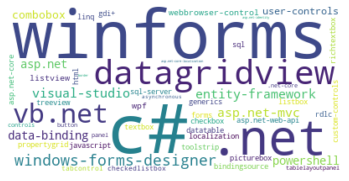

In [1]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np
 
#URL del perfil con las etiquetas de SO
 
url = "https://stackoverflow.com/users/3110834/reza-aghaei?tab=tags"
page = requests.get(url)
soup = BeautifulSoup(page.content, 'html.parser')
 
#etiquetas Scraping
et = soup.find_all('a', class_='post-tag')
frec = soup.find_all('span', class_='item-multiplier-count')
 
#listaetiqueta
etiquetas = list()
for i in et:
    etiquetas.append(i.text)
 
frecuencia = list()
for i in frec:
#Aquí añadimos int() porque el método generate_from_frequencies() necesita enteros no string
    frecuencia.append(int(i.text)) 
 
#Aquí utilizamos zip para unir las etiquetas con sus repsectivas frecuencias
frecuencias = dict(zip(etiquetas, frecuencia))
 
#Utilizamos el método .generate_from_frequencies pasandole las frecuencias
cloud = WordCloud(background_color="white").generate_from_frequencies(frecuencias)
plt.figure()
plt.imshow(cloud, interpolation="bilinear")
plt.axis("off")
plt.show()